<a href="https://colab.research.google.com/github/nabin012/ybi-foundation-project/blob/main/credit_card_fraud_detection_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
#load the dataset to a pandas dataframe
credit_card_data = pd.read_csv('/content/CreditCardDefault.csv')


In [8]:
#first five rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
#showing last 5 data of the dataset
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [10]:
#dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
#checking the number of missing values in each col
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
#checking the data of legit and fraud transcation
#0 represent legit trans wheras 1 represent fraud trans
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64


This dataset is Highly unbalanced as you can see the number of the legit transcation is more so if we take priority to legit data more then in any test result it will show the legit transcation so we need to balanced this data




In [13]:
#seperatin the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [14]:
print(legit.shape)
print(fraud.shape)


(284315, 31)
(492, 31)


In [15]:
#statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
fraud.Amount.describe()


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
#compare the values for both transcation
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Balancing the data using undersampling

Build the sample dataset containing the similar distribution of data between the normal transc and fraud transc

no of fraud tranc--->415

In [18]:
#random sampling is done
legit_sample= legit.sample(n=415)

In [19]:
#concatenating two data frames
new_dataset = pd.concat([legit_sample , fraud], axis=0)

In [20]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
30907,36134.0,-2.672523,-0.498378,1.597593,1.025214,0.603062,0.433151,-0.616697,0.576214,-0.099513,...,-0.102980,0.813599,0.801775,-0.777919,0.844510,-0.013883,0.104563,-0.303668,1.00,0
87804,61852.0,1.287890,0.619780,-1.115831,0.375093,1.140071,0.147443,0.293210,-0.022613,-0.543328,...,-0.148393,-0.298015,-0.250785,-1.416564,0.695376,0.460944,-0.010908,0.018413,0.76,0
153712,99902.0,1.946161,0.043024,-0.478291,1.854422,-0.071473,-0.316899,-0.079436,-0.215291,2.303398,...,-0.474107,-0.680916,0.243391,-0.088845,0.041952,-0.857150,0.019594,-0.048527,9.00,0
282935,171258.0,-1.458649,2.085297,-1.032399,-0.160631,-0.838964,-1.854241,0.049007,0.918142,-0.317358,...,0.508657,1.509435,0.144405,0.924247,-0.725554,-0.258728,0.361133,0.254085,7.99,0
29594,35541.0,1.028807,-0.167460,1.344620,1.649794,-0.717662,0.807931,-0.610833,0.397065,0.923157,...,-0.348086,-0.536813,0.095209,0.228722,0.381645,-0.540081,0.090843,0.020739,7.40,0


In [21]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [22]:
new_dataset['Class'].value_counts()
#here you can see uniformly distributed data

1    492
0    415
Name: Class, dtype: int64

In [23]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95525.831325,0.071239,-0.046699,0.075117,-0.113139,-0.034220,-0.078908,0.041773,0.005776,0.003555,...,0.009390,0.012392,-0.040425,-0.024230,-0.054108,0.007223,-0.007515,-0.009725,0.003840,97.142578
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into features and targets

In [24]:
#here 'X' is features wheras 'Y' is class
X = new_dataset.drop(columns='Class', axis=1) 
Y = new_dataset['Class']

In [25]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
30907    36134.0 -2.672523 -0.498378  1.597593  1.025214  0.603062  0.433151   
87804    61852.0  1.287890  0.619780 -1.115831  0.375093  1.140071  0.147443   
153712   99902.0  1.946161  0.043024 -0.478291  1.854422 -0.071473 -0.316899   
282935  171258.0 -1.458649  2.085297 -1.032399 -0.160631 -0.838964 -1.854241   
29594    35541.0  1.028807 -0.167460  1.344620  1.649794 -0.717662  0.807931   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [26]:
print(Y)

30907     0
87804     0
153712    0
282935    0
29594     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 907, dtype: int64


Spliiting the data into training data and testing data

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [66]:
print(X.shape, X_train.shape, X_test.shape)
#data splitted into train and test data

(907, 30) (725, 30) (182, 30)


Model Training (Logistic Regression)

In [67]:
model = LogisticRegression()

In [68]:
#training the model
model.fit(X_train, Y_train)

LogisticRegression()

In [69]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy= accuracy_score(X_train_prediction, Y_train)

In [70]:
print("Acuuracy is :",training_data_accuracy)

Acuuracy is : 0.926896551724138


In [71]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [73]:
print("Accuray for test data:",test_data_accuracy)

Accuray for test data: 0.9010989010989011


here if the test data accuracy is different from train data the whether the model is overfitted model or underfitted model

Prediction using SVM model


In [74]:
from sklearn import svm

#creating a svm classifier
clf = svm.SVC(kernel='linear')


In [76]:
#training the model using training sets
clf.fit(X_train, Y_train)

SVC(kernel='linear')

In [77]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [78]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1])

In [79]:
# Model Accuracy:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9120879120879121


In [80]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        83
           1       0.98      0.86      0.91        99

    accuracy                           0.91       182
   macro avg       0.91      0.92      0.91       182
weighted avg       0.92      0.91      0.91       182



In [88]:
cf=confusion_matrix(Y_test,y_pred)
cf

array([[81,  2],
       [14, 85]])

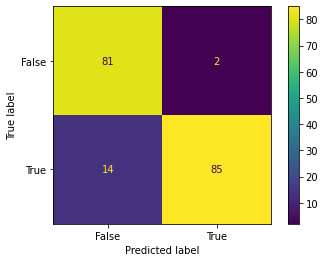

In [90]:
#displaying the confusion matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm_display=ConfusionMatrixDisplay(cf,display_labels = [False, True])
cm_display.plot()
plt.show()


KNN MODEL

In [93]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(X_train,Y_train)

KNeighborsClassifier()

In [96]:
#Predicting the test set result  
n_pred= classifier.predict(X_test)  
n_pred

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1])

In [99]:
#creating the confusion matrix
cm= confusion_matrix(Y_test, n_pred) 
cm

array([[42, 41],
       [38, 61]])

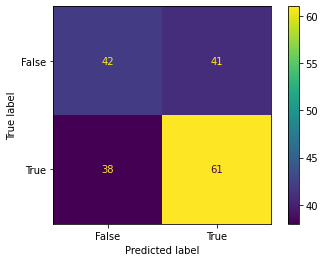

In [101]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cmr_display=ConfusionMatrixDisplay(cm,display_labels = [False, True])
cmr_display.plot()
plt.show()

In [102]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        83
           1       0.98      0.86      0.91        99

    accuracy                           0.91       182
   macro avg       0.91      0.92      0.91       182
weighted avg       0.92      0.91      0.91       182

